In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import seaborn as sns

%matplotlib inline

## 读取数据

In [2]:
train = pd.read_csv("FE_pima-indians-diabetes.csv")

## 数据预处理

In [3]:
y_train = train['Target']
X_train = train.drop(["Target"], axis=1)

## 模型训练

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
Cs = np.logspace(-3, 3, 7)
gammas = np.logspace(-4, 0, 5)

param_grid = {'C':Cs}
param_grid_R = {'C':Cs, 'gamma':gammas}

grid = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, n_jobs=4)
grid_RBF = GridSearchCV(SVC(kernel='rbf'), param_grid_R, cv=5, n_jobs=4)

grid.fit(X_train, y_train)
grid_RBF.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid_RBF.best_score_)
print(grid_RBF.best_params_)

0.7669270833333334
{'C': 0.01}
0.7682291666666666
{'C': 100.0, 'gamma': 0.001}


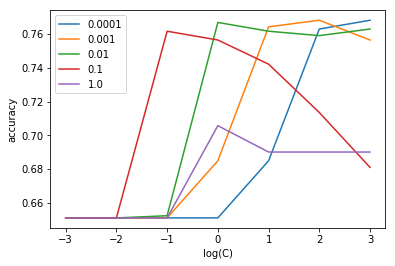

In [9]:
test_means = grid_RBF.cv_results_['mean_test_score']
test_stds = grid_RBF.cv_results_['std_test_score']
n_Cs = len(Cs)
n_gammas = len(gammas)

test_scores = np.array(test_means).reshape(n_Cs, n_gammas)
test_stds = np.array(test_stds).reshape(n_Cs,n_gammas)

x_axis = np.log10(Cs)
for i,value in enumerate(gammas):
    pyplot.plot(x_axis, test_scores[:, i], label=gammas[i])

pyplot.legend()
pyplot.xlabel('log(C)')
pyplot.ylabel('accuracy')
pyplot.show()